### Load text

In [3]:
import re
import os
import pdfplumber

In [4]:
# Extract information from PDF
def extract_text_info(filepath):

    with pdfplumber.open(filepath) as pdf:
        text = ""
        for page in pdf.pages:
            text += page.extract_text().strip().lower()
    text = re.sub("\s+", " ", text)
    return text

In [7]:
# Save all documents and materials in the list  2019-2022
statement_root = ".\Material\Statement"
minutes_root = ".\Material\Minutes"


def load_text(root):
    result_text = []
    for i in os.listdir(root):
        file_path = os.path.join(root, i)
        year_text = []
        for j in os.listdir(file_path):
            text_path = os.path.join(file_path, j)
            temp = extract_text_info(text_path)
            year_text.append(temp)
        result_text.append(year_text)
    return result_text

# save the data in the nest list
statement_text = load_text(statement_root)
minutes_text = load_text(minutes_root)

### data processing

In [15]:
from nltk.tokenize import word_tokenize

"""
tokenize the text
"""
statement_text = [[word_tokenize(text) for text in text_list] for text_list in statement_text]
minutes_text = [[word_tokenize(text) for text in text_list] for text_list in minutes_text]

In [20]:
# statement_text

In [24]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

"""
remove the stop words
"""
def remove_stop_words(text_list):
    result_text = []
    for text in text_list:
        temp_list_1 = []
        for word_list in text:
            temp_list = []
            for word in word_list:
                # Conditions for judgment
                if word not in stop_words and len(word) > 3 and word.isalpha():
                    temp_list.append(word)
            temp_list_1.append(temp_list)
        result_text.append(temp_list_1)
    return result_text

statement_text = remove_stop_words(statement_text)
minutes_text = remove_stop_words(minutes_text)

### Data analysis

#### Word frequency analysis

In [26]:
from nltk import FreqDist
import matplotlib.pyplot as plt

In [27]:
statement_word = [word for word_list in statement_text for word in word_list]
minutes_word = [word for word_list in minutes_text for word in word_list]

Use the word cloud to show the key words in the information meeting materials

(-0.5, 799.5, 399.5, -0.5)

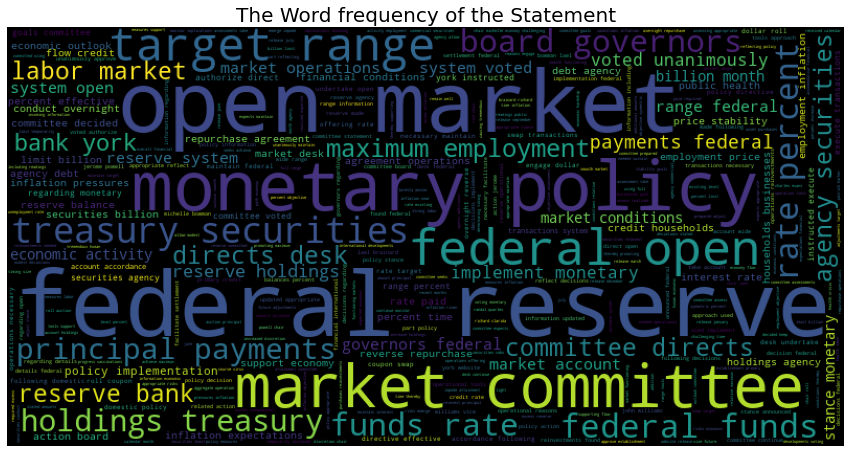

In [30]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='black',
                      max_words=1000)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud.generate(" ".join([word for word_list in statement_word for word in word_list])))
plt.title("The Word frequency of the Statement",fontsize=20)
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

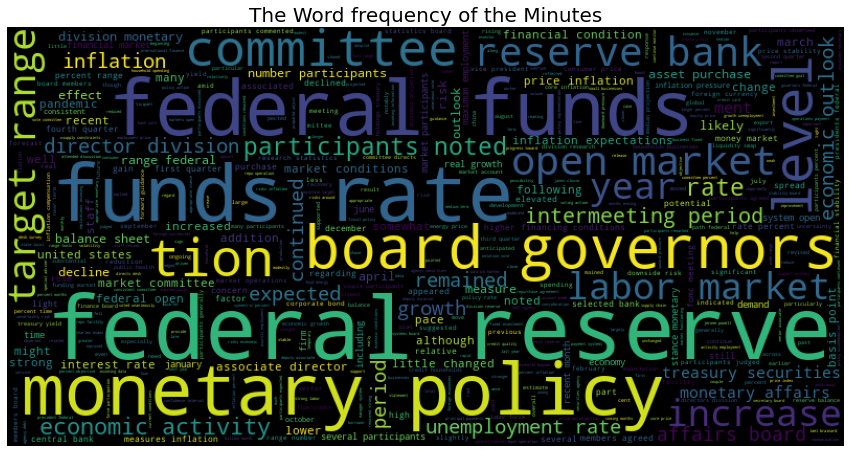

In [31]:
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='black',
                      max_words=1000)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud.generate(" ".join([word for word_list in minutes_word for word in word_list])))
plt.title("The Word frequency of the Minutes",fontsize=20)
plt.axis("off")

At eight different time nodes, the number of top keywords in the Federal Reserve interest rate meeting changed

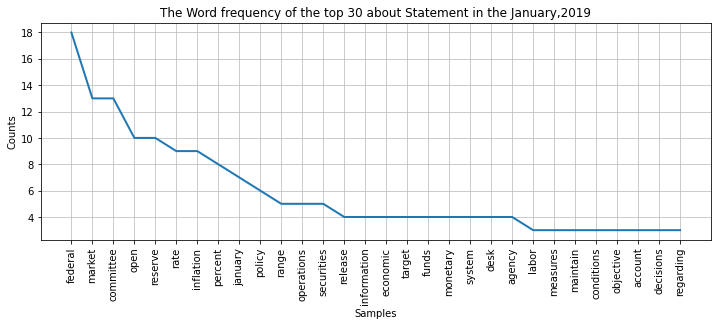

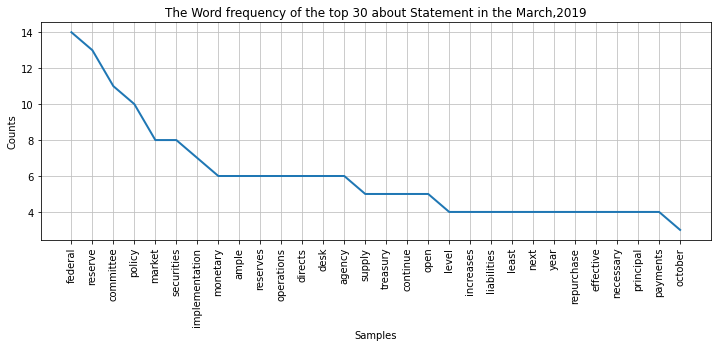

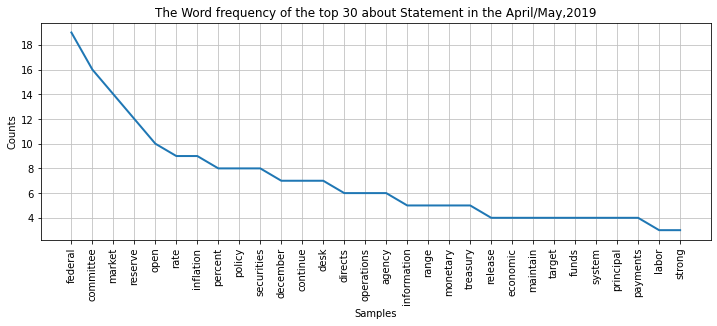

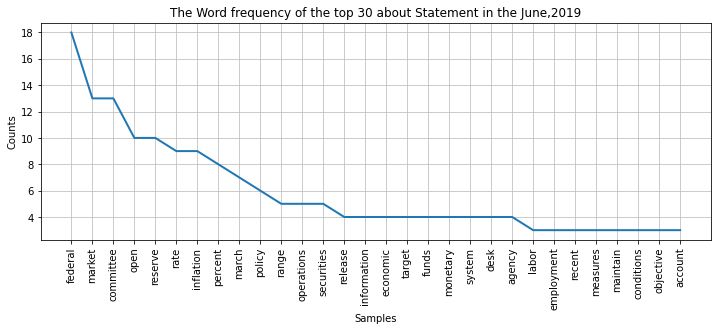

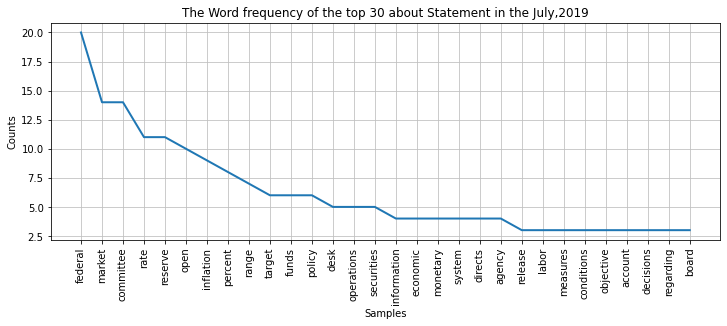

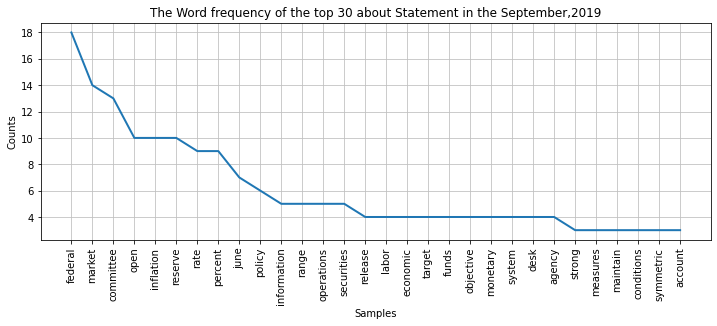

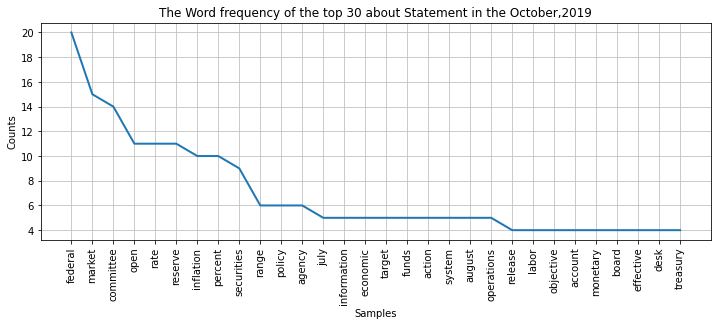

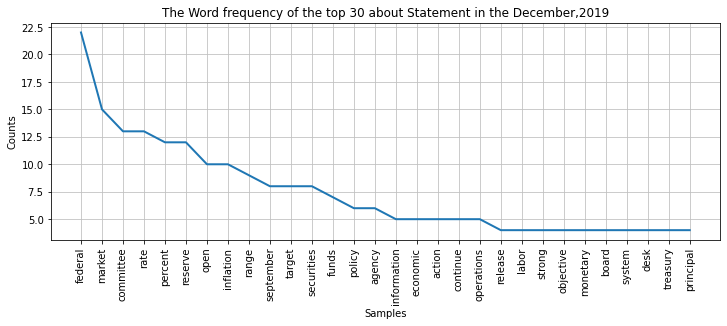

In [36]:
date = ["January", "March", "April/May", "June",
        "July", "September", "October", "December"]
for index, month in enumerate(date):
    plt.figure(figsize=(12, 4))
    FreqDist(statement_text[0][index]).plot(
        30, cumulative=False, title="The Word frequency of the top 30 about Statement in the {},2019".format(month))

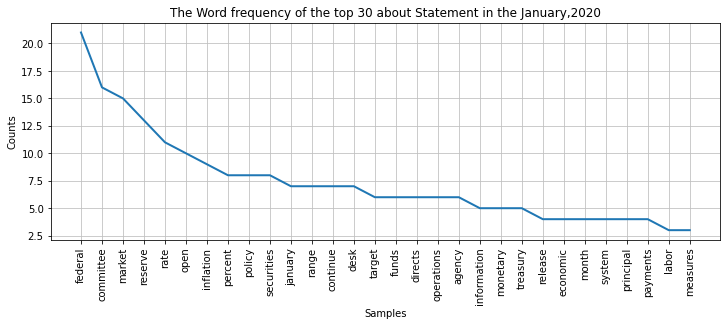

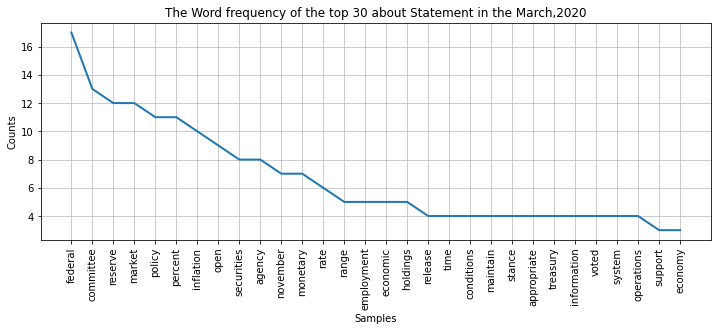

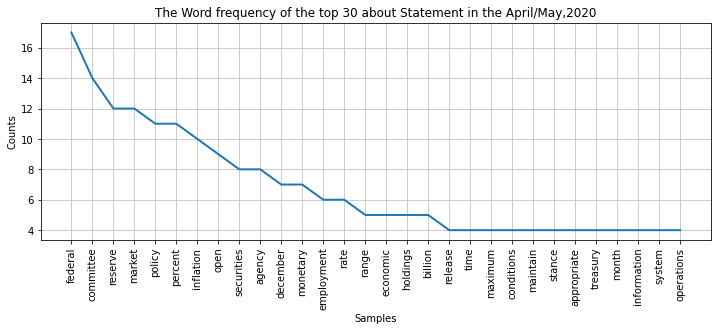

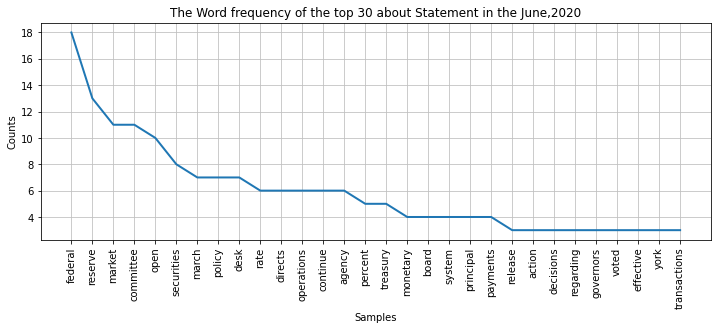

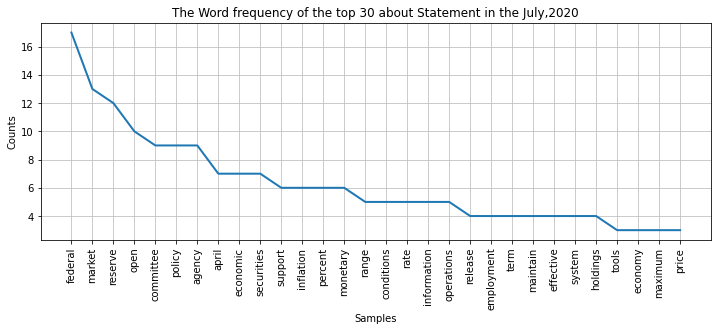

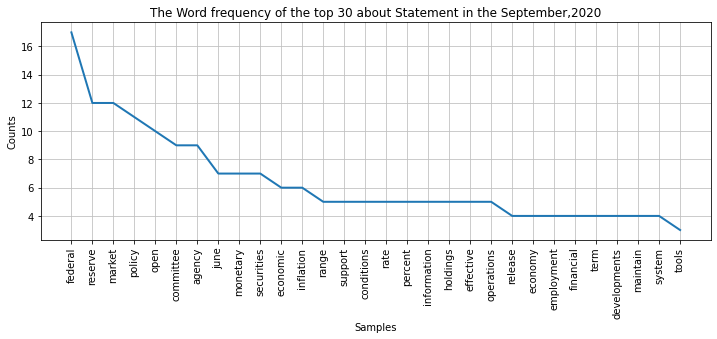

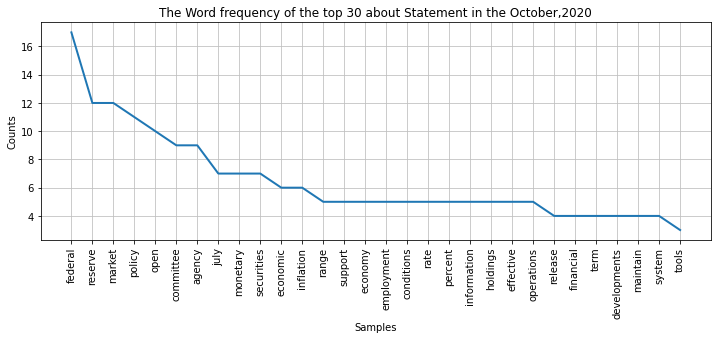

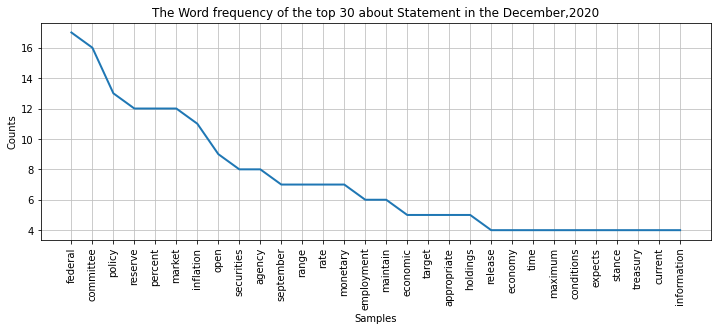

In [37]:
date = ["January", "March", "April/May", "June",
        "July", "September", "October", "December"]
for index, month in enumerate(date):
    plt.figure(figsize=(12, 4))
    FreqDist(statement_text[1][index]).plot(
        30, cumulative=False, title="The Word frequency of the top 30 about Statement in the {},2020".format(month))

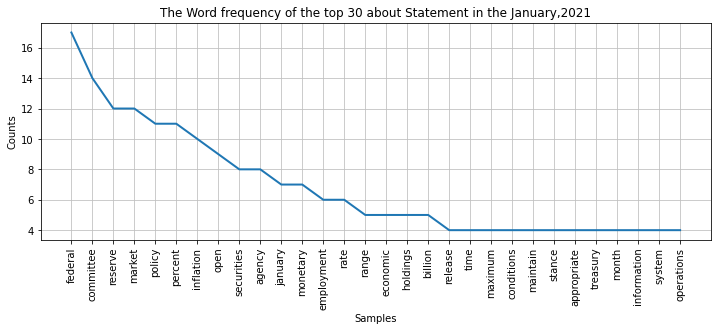

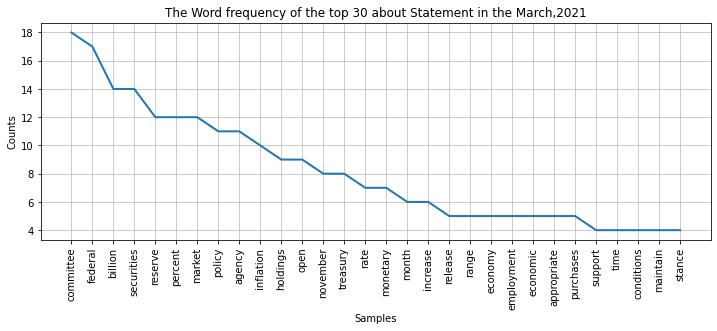

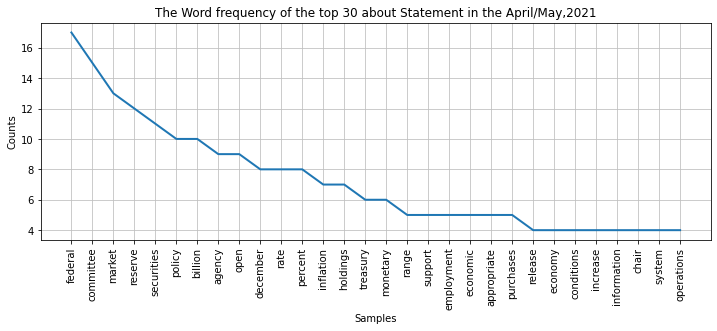

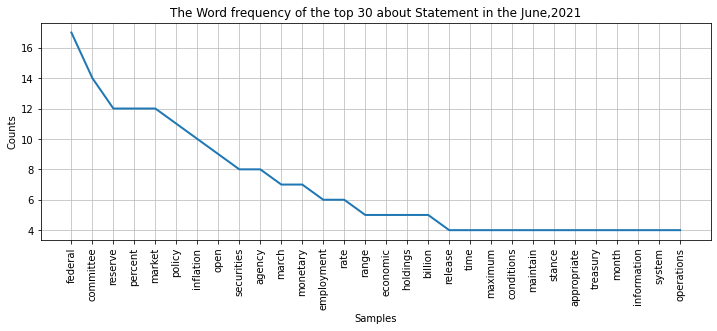

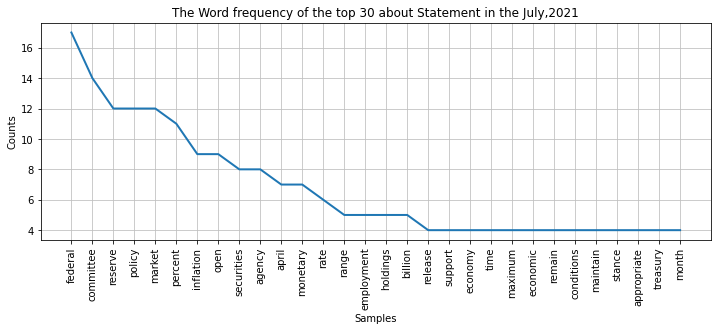

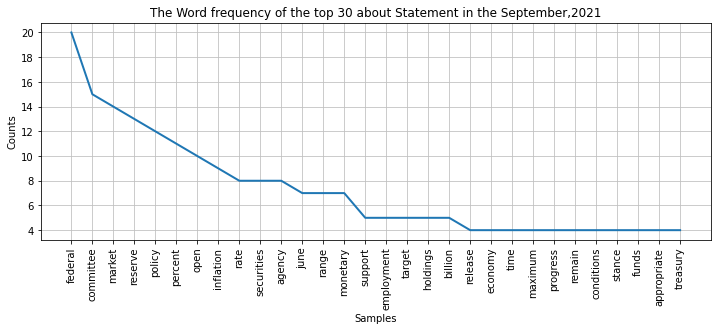

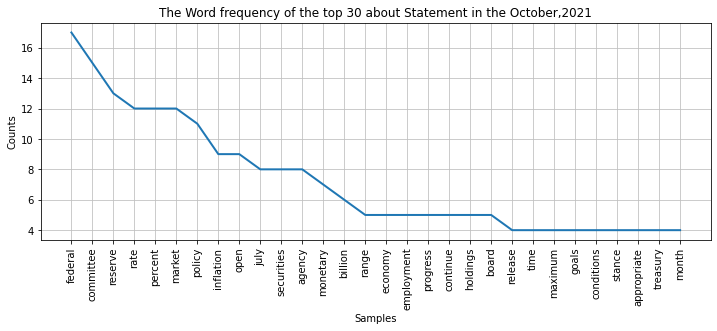

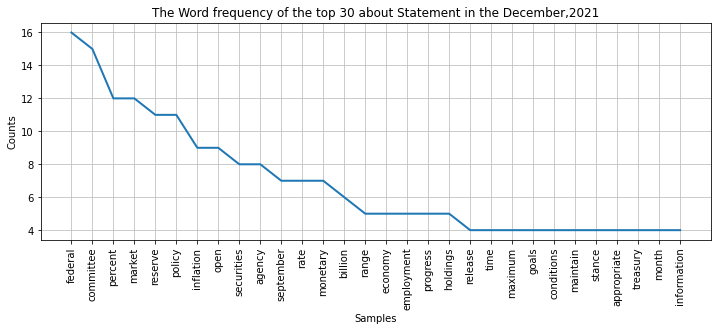

In [38]:
date = ["January", "March", "April/May", "June",
        "July", "September", "October", "December"]
for index, month in enumerate(date):
    plt.figure(figsize=(12, 4))
    FreqDist(statement_text[2][index]).plot(
        30, cumulative=False, title="The Word frequency of the top 30 about Statement in the {},2021".format(month))

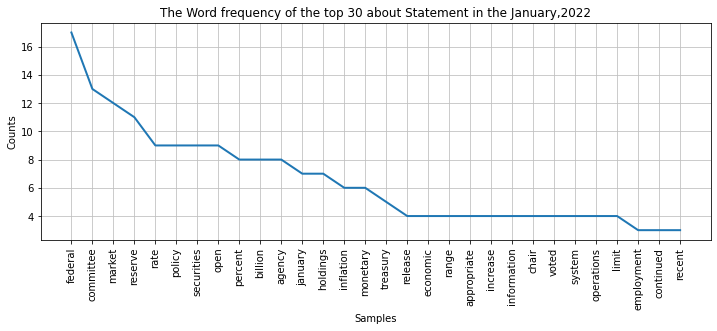

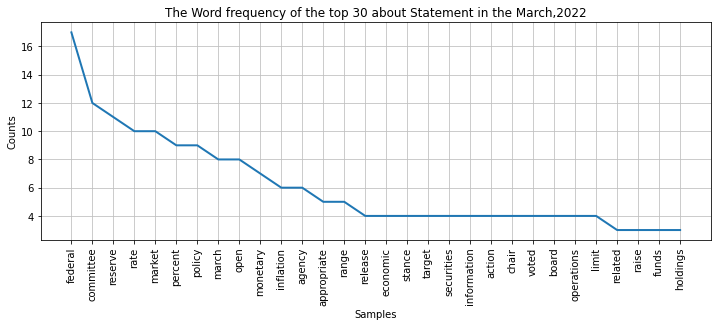

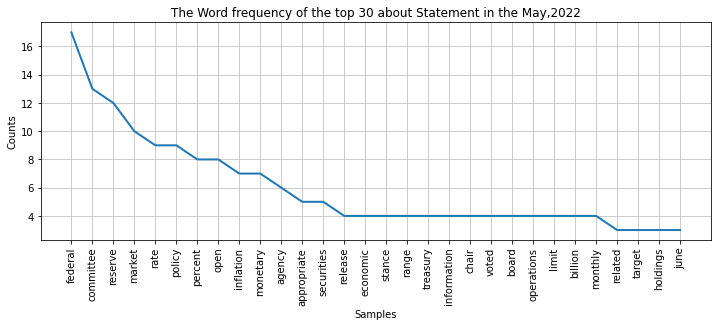

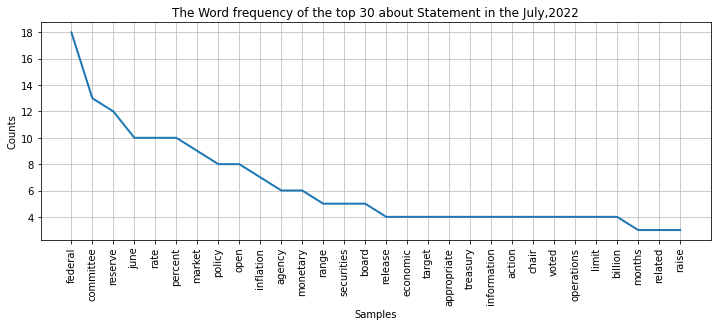

In [60]:
date = ["January", "March",  "May","July",]
for index, month in enumerate(date):
    plt.figure(figsize=(12, 4))
    FreqDist(statement_text[3][index]).plot(
        30, cumulative=False, title="The Word frequency of the top 30 about Statement in the {},2022".format(month))

#### Text topic modeling and analysis

In [40]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim

Topic modeling analysis: analyze the topic modeling at different time points of the interest conference, and then analyze the main points at different time points, so as to understand the analysis

In [55]:
# Adjust by indicating different time points  in the 2019
date = ["2019","2020","2021","2022"]
index = 0

dictionary = corpora.Dictionary([[word for word_list in statement_text[index] for word in word_list]])
corpus = [dictionary.doc2bow(word_list) for word_list in statement_text[index]]
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2)
show = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.display(show)

In [56]:
# Adjust by indicating different time points in the 2020
date = ["2019","2020","2021","2022"]
index = 1

dictionary = corpora.Dictionary([[word for word_list in statement_text[index] for word in word_list]])
corpus = [dictionary.doc2bow(word_list) for word_list in statement_text[index]]
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2)
show = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.display(show)

In [57]:
# Adjust by indicating different time points in the 2021
date = ["2019","2020","2021","2022"]
index = 2

dictionary = corpora.Dictionary([[word for word_list in statement_text[index] for word in word_list]])
corpus = [dictionary.doc2bow(word_list) for word_list in statement_text[index]]
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2)
show = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.display(show)

In [58]:
# Adjust by indicating different time points in the 2022
date = ["2019","2020","2021","2022"]
index = 3

dictionary = corpora.Dictionary([[word for word_list in statement_text[index] for word in word_list]])
corpus = [dictionary.doc2bow(word_list) for word_list in statement_text[index]]
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2)
show = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.display(show)